In [2]:
#importing all modules and setting plotting format
import pandas as pd
import os
import csv
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'



In [3]:
#opening the list of APOGEE type 1 IDs
with open('/Volumes/CoveyData/APOGEE_Spectra/Anna/clean_IDs_list.csv') as csvfile:
    LCData = csv.reader(csvfile, delimiter = ',')
    listID = [0]
    for row in LCData:
        IDs = row[0]
        listID.append(IDs)
    del(listID[0])  
    listID[0] = '2M00224443+8448486'

#opening the list of the periods of the APOGEE IDs    
with open('/Volumes/CoveyData/APOGEE_Spectra/Anna/periods.csv') as csvfile:
    period = csv.reader(csvfile, delimiter = ',')
    days = []
    IDList = []
    for this in period:
        Apogee=this[0]
        IDList.append(Apogee)
        periods = this[1]
        days.append(periods)
    

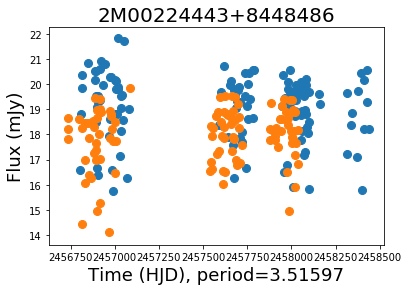

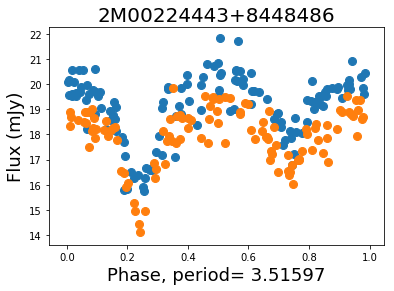

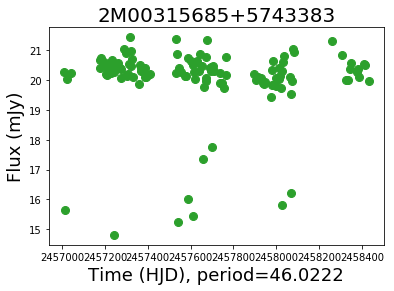

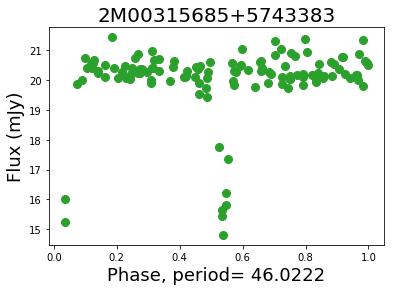

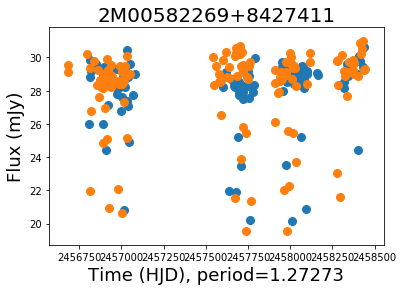

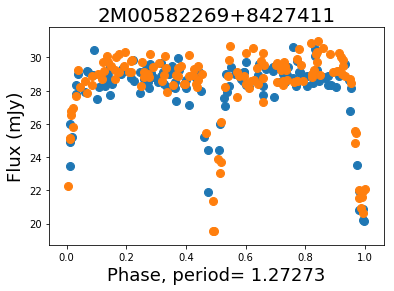

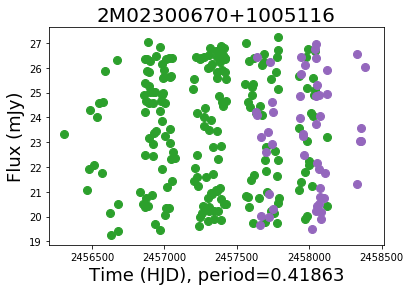

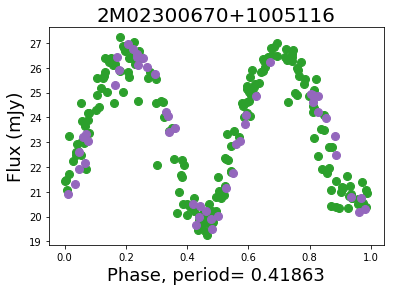

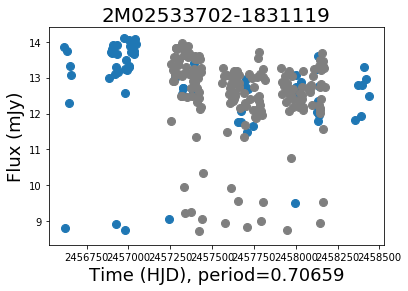

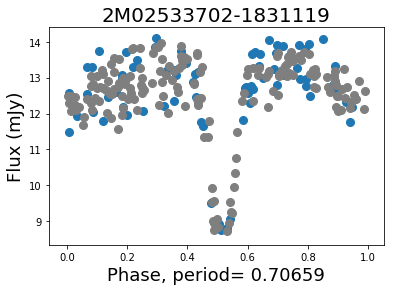

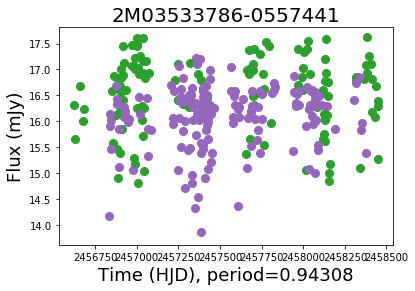

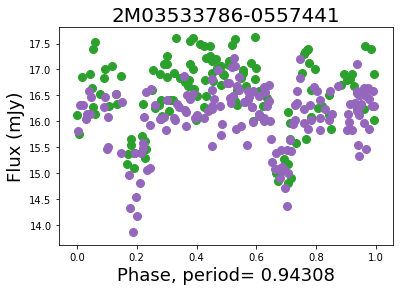

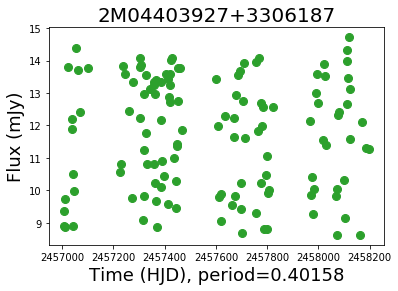

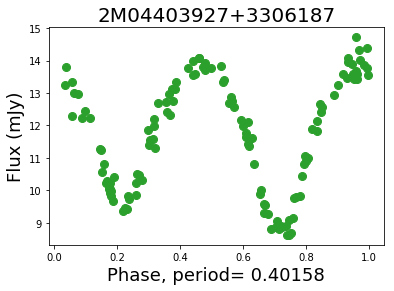

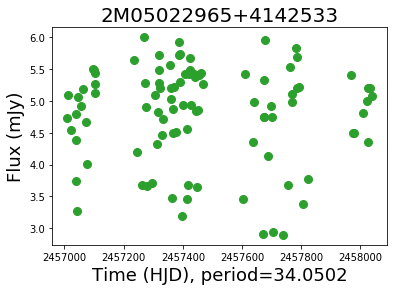

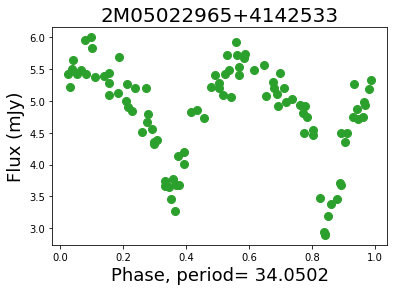

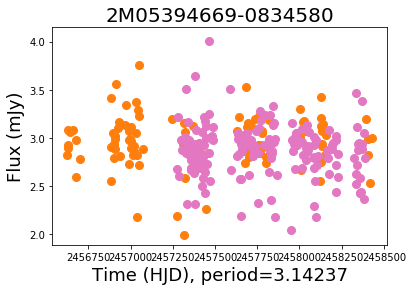

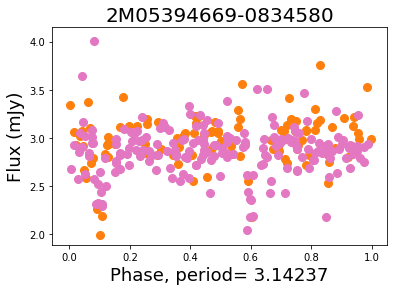

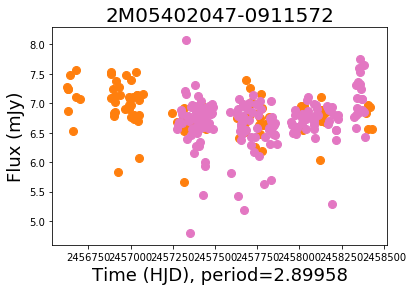

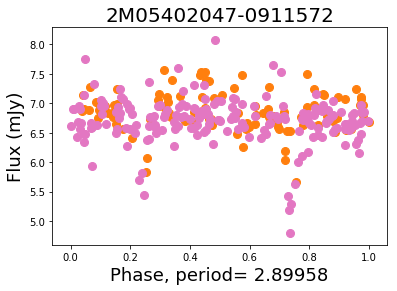

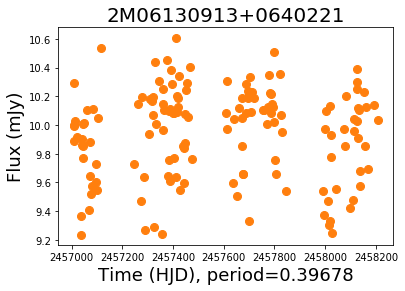

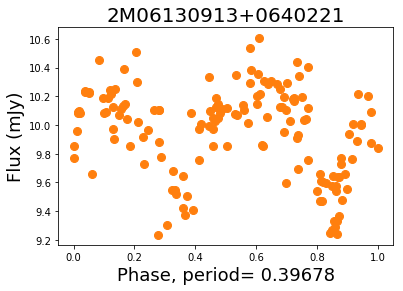

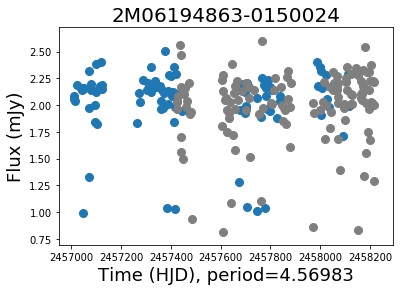

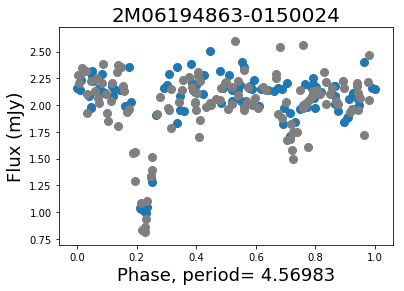

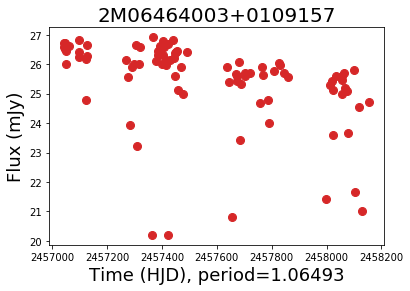

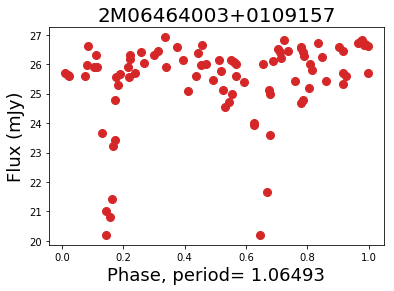

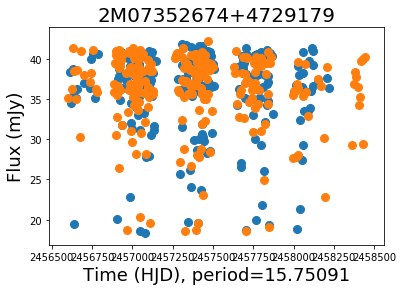

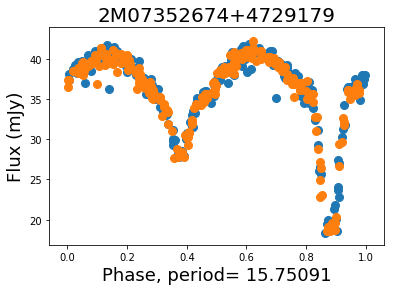

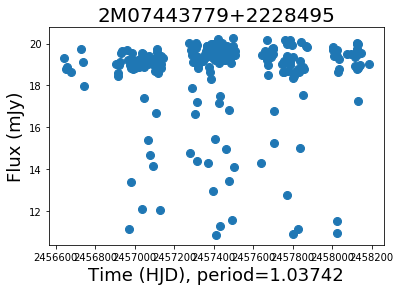

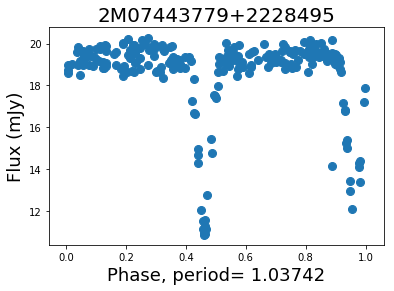

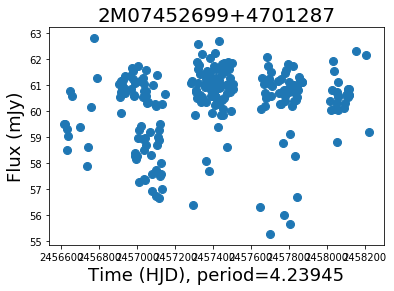

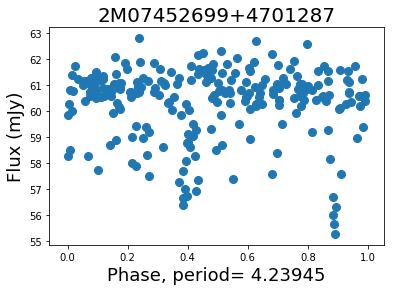

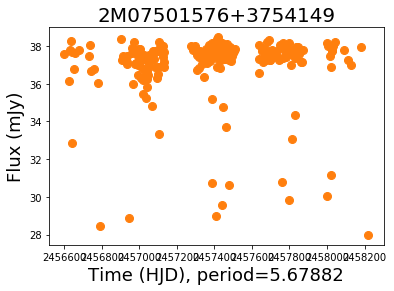

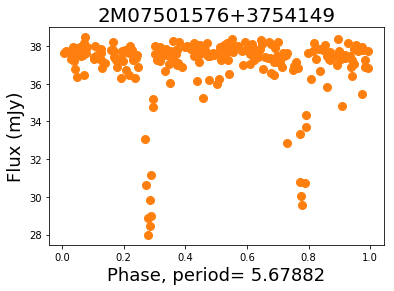

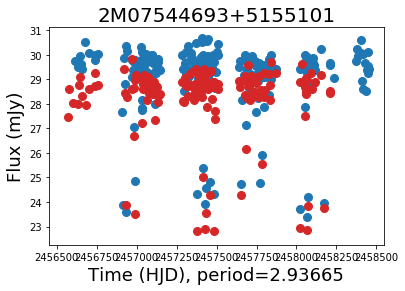

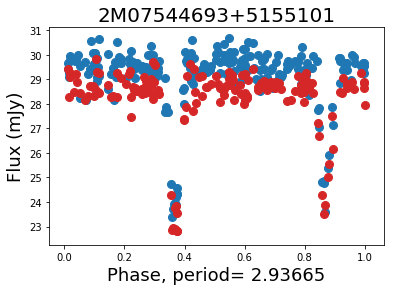

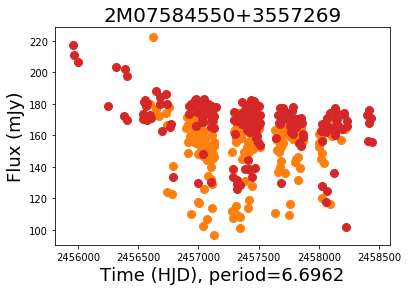

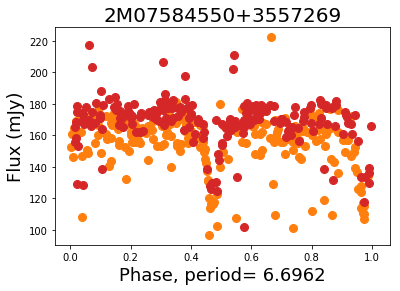

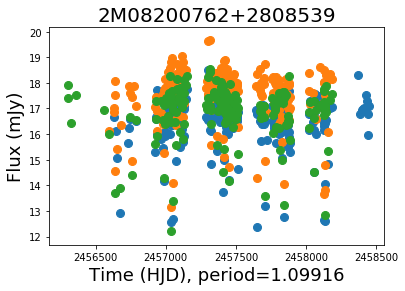

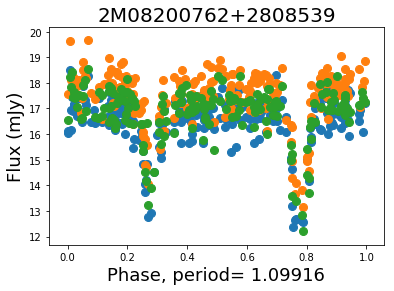

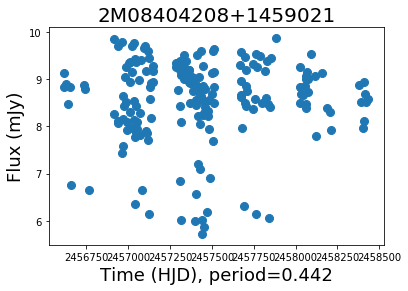

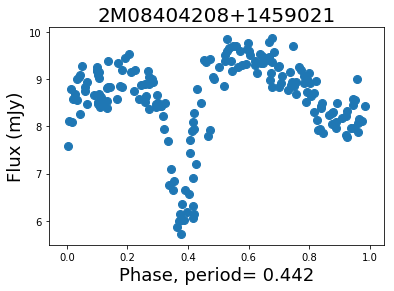

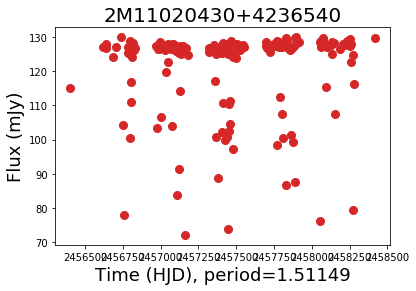

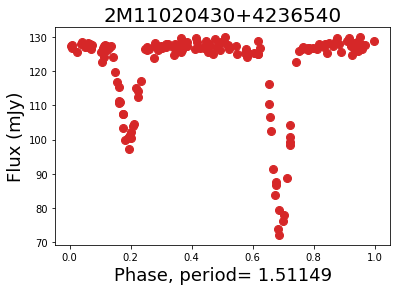

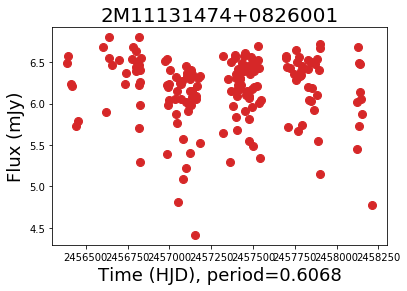

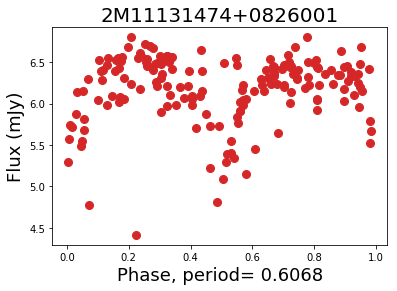

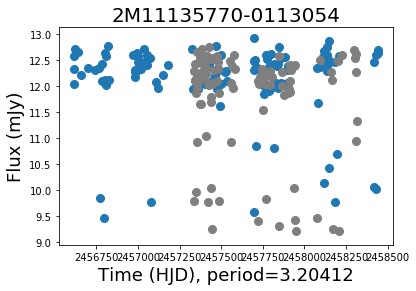

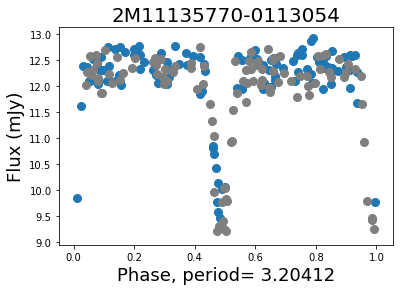

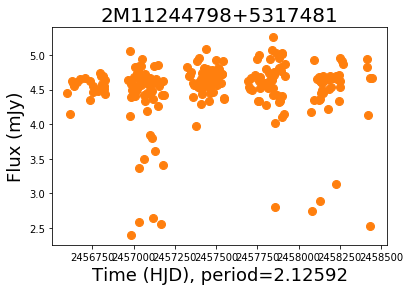

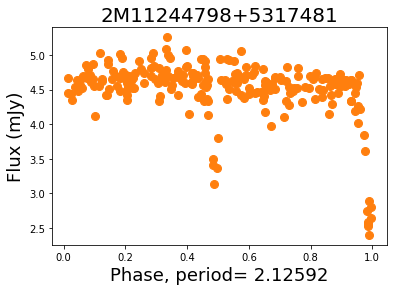

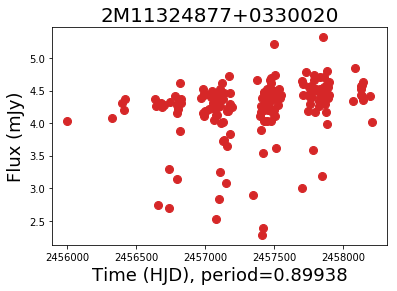

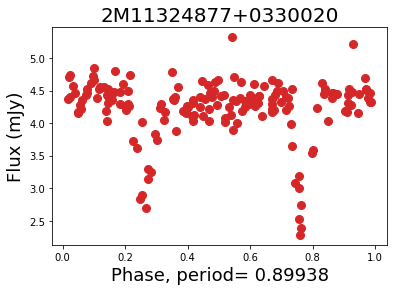

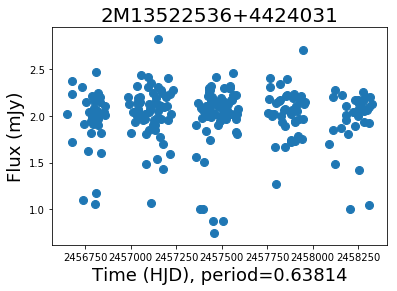

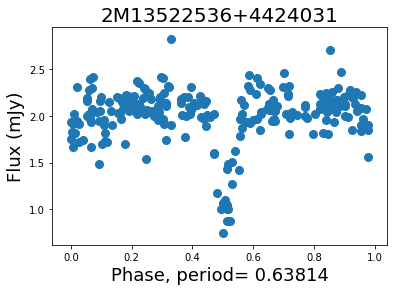

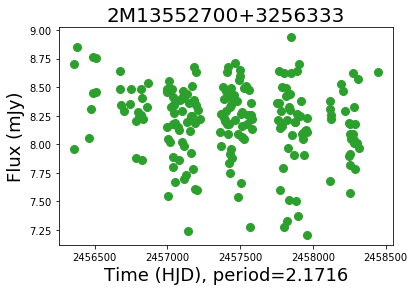

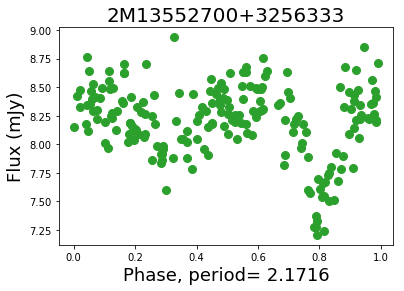

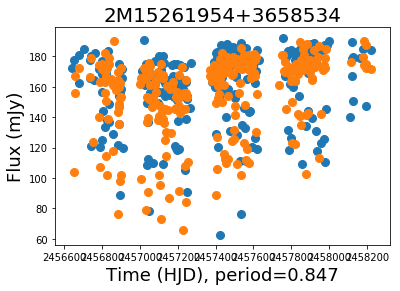

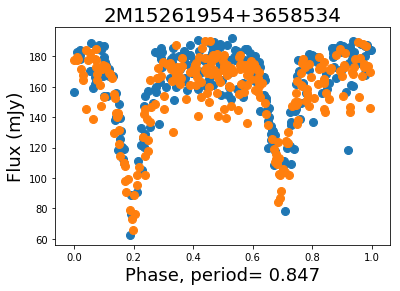

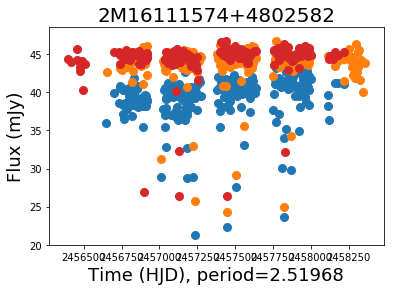

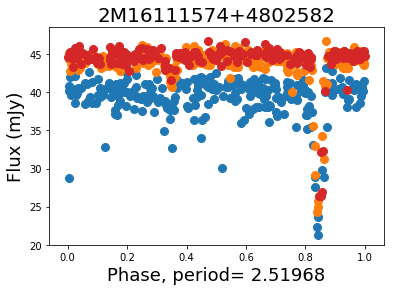

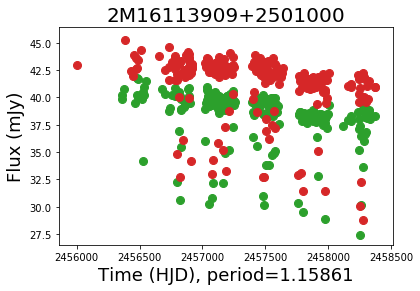

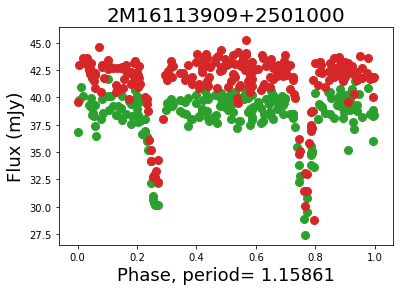

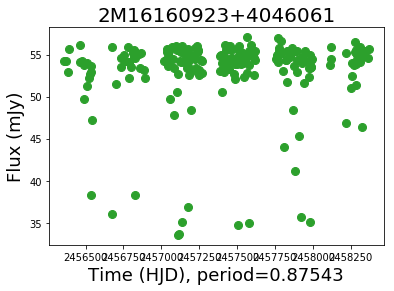

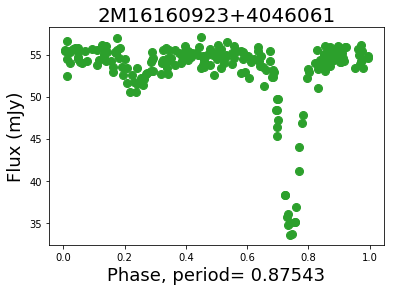

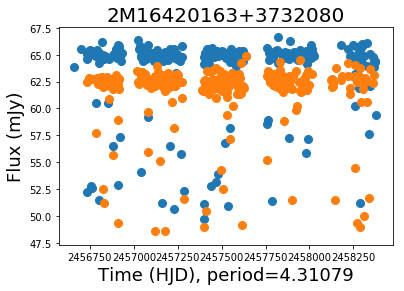

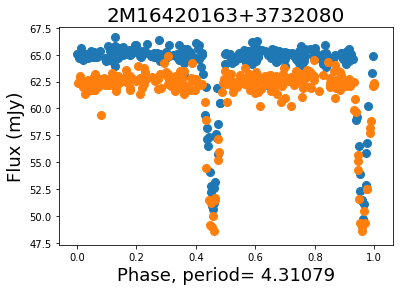

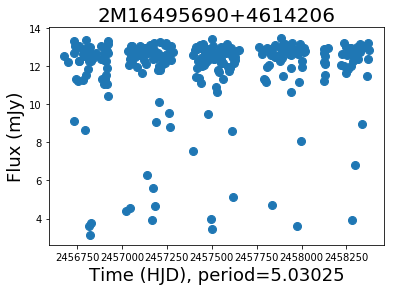

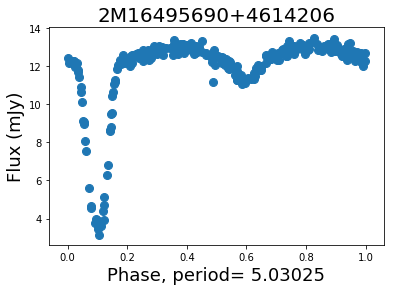

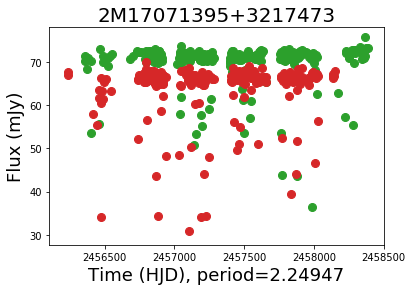

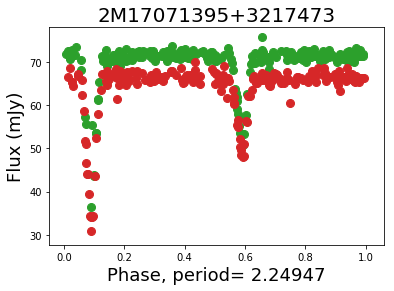

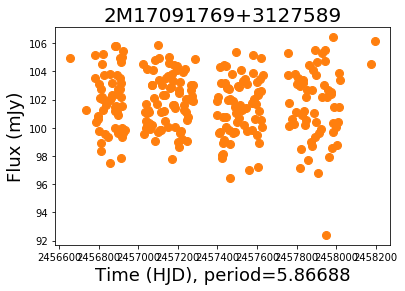

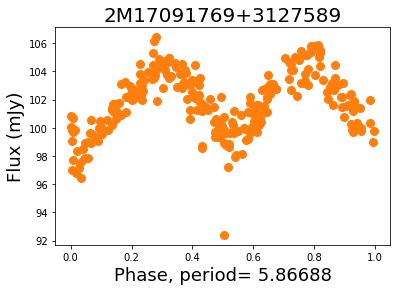

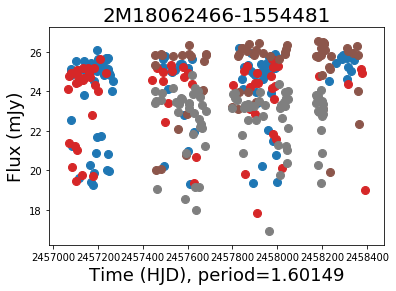

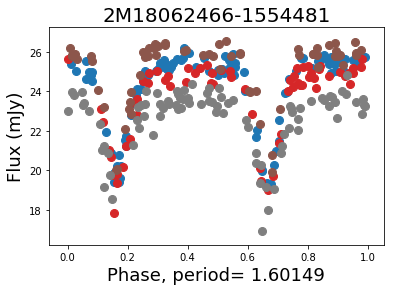

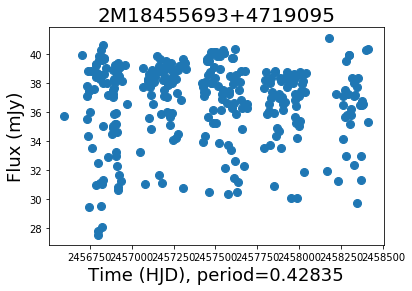

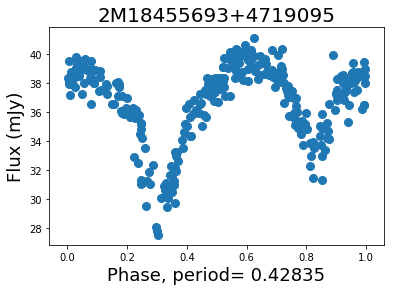

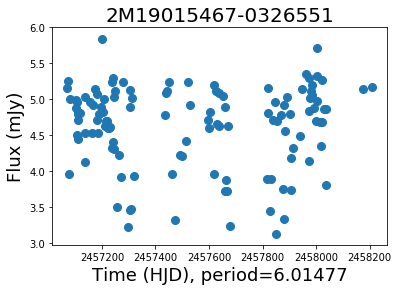

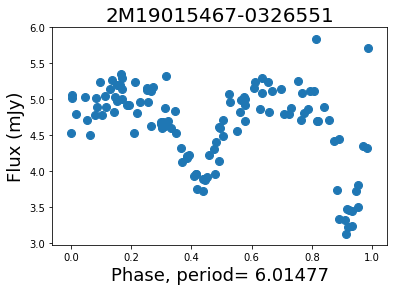

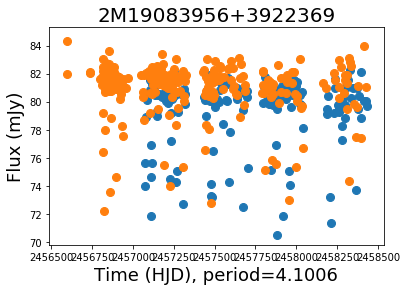

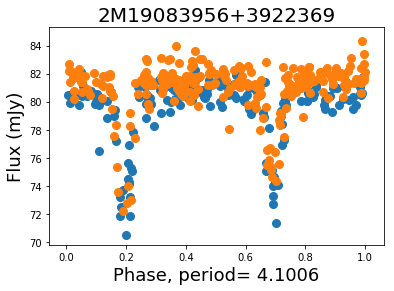

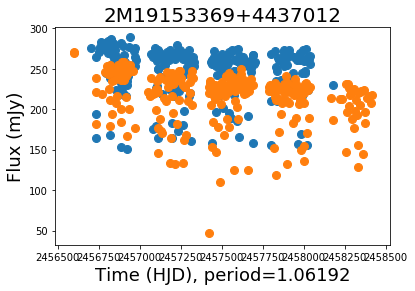

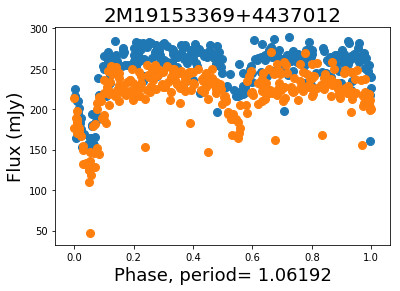

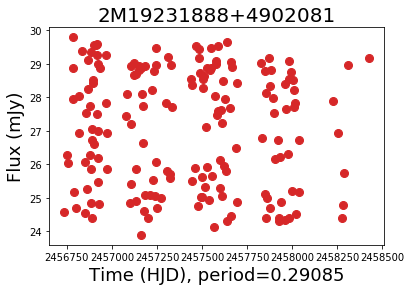

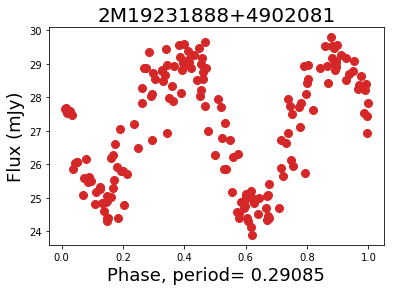

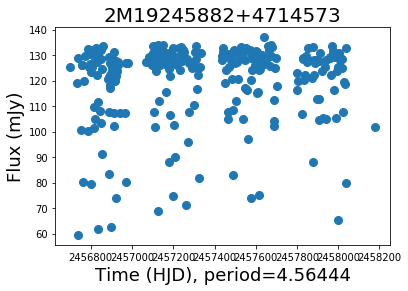

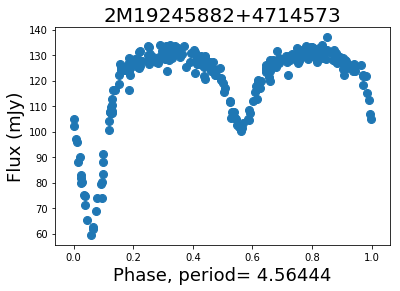

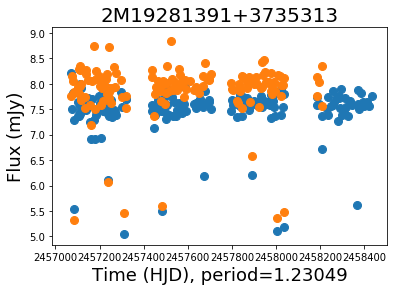

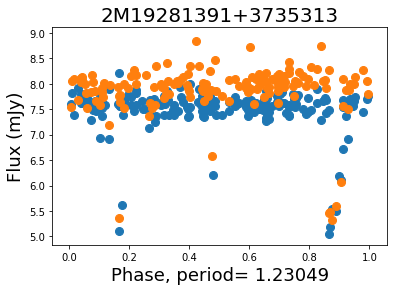

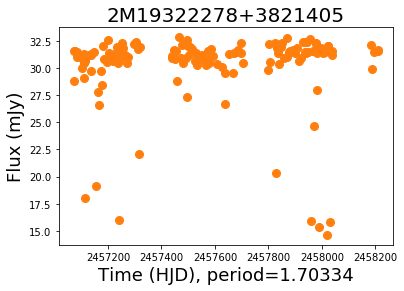

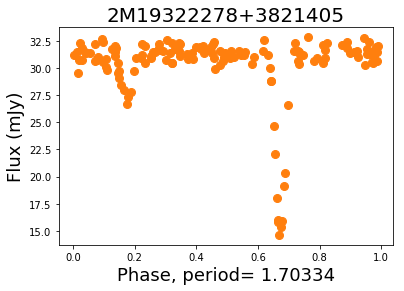

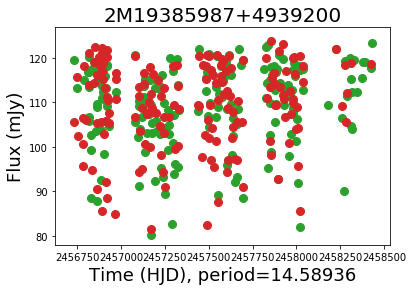

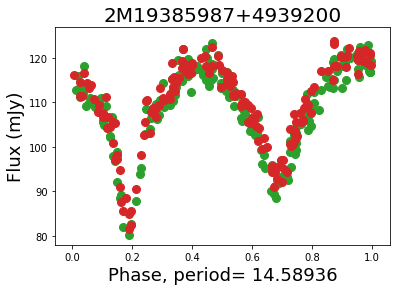

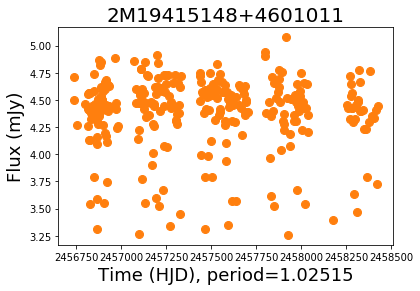

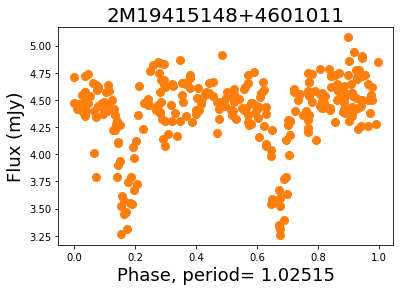

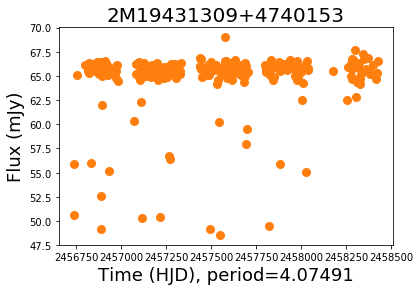

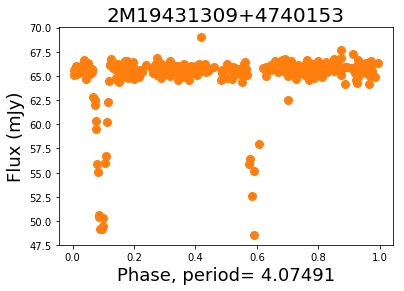

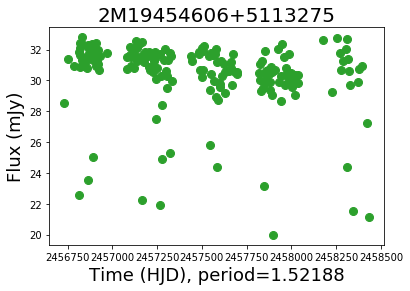

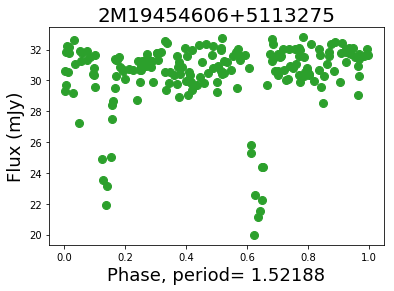

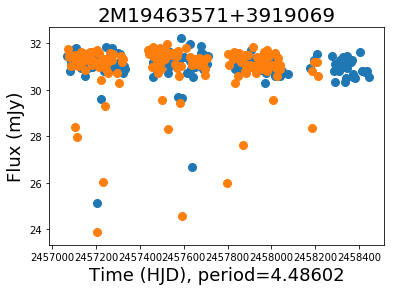

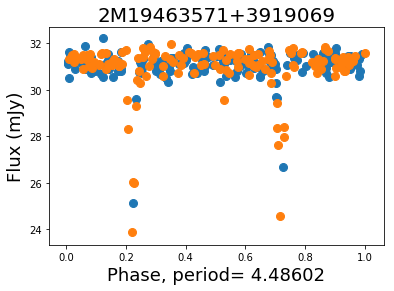

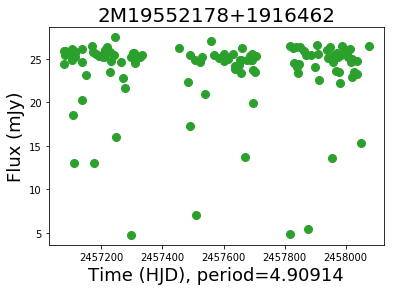

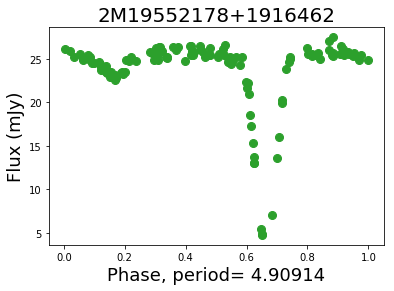

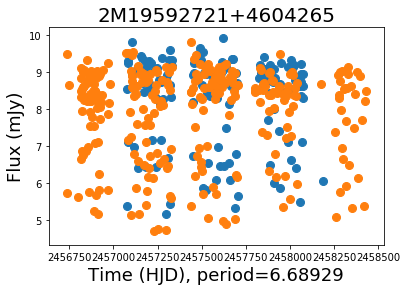

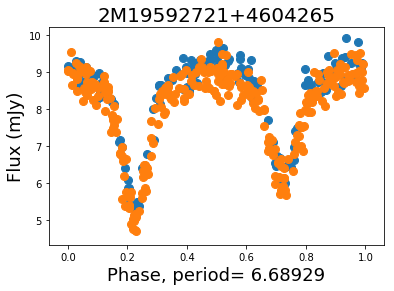

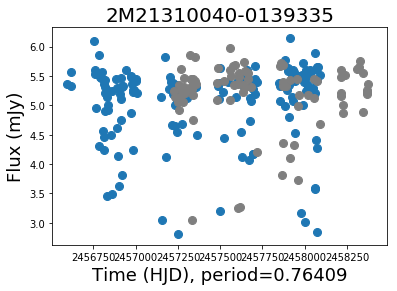

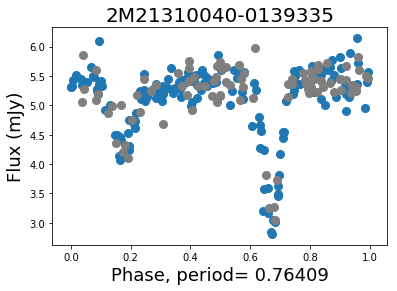

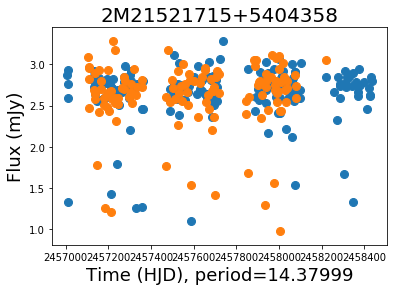

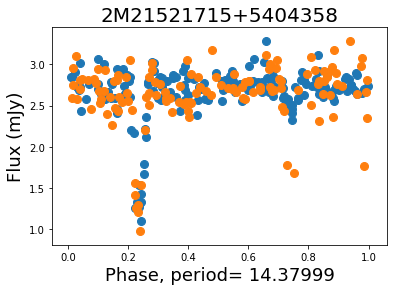

In [3]:
#defining a function LightCurve to take the list of IDS, find their file, and then plot the data
def LightCurveFlux(listofID):
    #using i to find the index within the period list while running the for loop
    i = 0
    for x in listofID:
        blah = '/Volumes/CoveyData/APOGEE_Spectra/Anna/Light_curves/'+x+'.LC.csv'
        newDF = pd.read_csv(blah)        
        BECamera = newDF[newDF['camera']== 'be']
        BDCamera = newDF[newDF['camera']== 'bd']     
        BCCamera = newDF[newDF['camera']== 'bc']
        BACamera = newDF[newDF['camera']== 'ba']
        BBCamera = newDF[newDF['camera']== 'bb']
        BFCamera = newDF[newDF['camera']== 'bf']
        BGCamera = newDF[newDF['camera']== 'bg']
        BHCamera = newDF[newDF['camera']== 'bh']
       #plotting the unphased light curves
        UnphasedLightCurve = plt.scatter(BDCamera['hjd'],BDCamera['flux (mJy)'])
        UnphasedLightCurve = plt.scatter(BCCamera['hjd'], BCCamera ['flux (mJy)'])
        UnphasedLightCurve = plt.scatter(BACamera['hjd'], BACamera['flux (mJy)'])
        UnphasedLightCurve = plt.scatter(BBCamera['hjd'], BBCamera['flux (mJy)'])
        UnphasedLightCurve = plt.scatter(BECamera['hjd'], BECamera['flux (mJy)'])
        UnphasedLightCurve = plt.scatter(BFCamera['hjd'], BFCamera['flux (mJy)'])
        UnphasedLightCurve = plt.scatter(BGCamera['hjd'], BGCamera['flux (mJy)'])
        UnphasedLightCurve = plt.scatter(BHCamera['hjd'], BHCamera['flux (mJy)'])
        plt.title(x)
        plt.xlabel('Time (HJD), period='+days[i])
        plt.ylabel('Flux (mJy)')
        #plt.savefig(x+'_Unphased')
        plt.show(UnphasedLightCurve)
        #plotting the phased light curve right underneath
        period = float(days[i])
        phaseBD = (BDCamera['hjd']%period)/period
        phaseBC = (BCCamera['hjd']%period)/period
        phaseBA = (BACamera['hjd']%period)/period
        phaseBB = (BBCamera['hjd']%period)/period
        phaseBE = (BECamera['hjd']%period)/period
        phaseBF = (BFCamera['hjd']%period)/period
        phaseBG = (BGCamera['hjd']%period)/period
        phaseBH = (BHCamera['hjd']%period)/period 
        PhasedLightCurve = plt.scatter(phaseBD, BDCamera['flux (mJy)'])
        PhasedLightCurve = plt.scatter(phaseBC, BCCamera['flux (mJy)'])
        PhasedLightCurve = plt.scatter(phaseBA, BACamera['flux (mJy)'])
        PhasedLightCurve = plt.scatter(phaseBB, BBCamera['flux (mJy)'])
        PhasedLightCurve = plt.scatter(phaseBE, BECamera['flux (mJy)'])
        PhasedLightCurve = plt.scatter(phaseBF, BFCamera['flux (mJy)'])
        PhasedLightCurve = plt.scatter(phaseBG, BGCamera['flux (mJy)'])
        PhasedLightCurve = plt.scatter(phaseBH, BHCamera['flux (mJy)'])
        plt.title(x)
        plt.xlabel('Phase, period= '+days[i])
        plt.ylabel('Flux (mJy)')
        #plt.savefig(x+'_Phased')
        plt.show(PhasedLightCurve)
        i= i+1
        
        
LightCurveFlux(listID)        

In [24]:
bleh = '/Volumes/CoveyData/APOGEE_Spectra/Anna/Light_curves/2M00224443+8448486.LC.csv'
newDF = pd.read_csv(bleh)
BECamera = newDF[newDF['camera']== 'be']
BDCamera = newDF[newDF['camera']== 'bd']     
BCCamera = newDF[newDF['camera']== 'bc']
BACamera = newDF[newDF['camera']== 'ba']
BBCamera = newDF[newDF['camera']== 'bb']
BFCamera = newDF[newDF['camera']== 'bf']
BGCamera = newDF[newDF['camera']== 'bg']
BHCamera = newDF[newDF['camera']== 'bh']

medianFlux = DataFrame.median(BCCamera['flux (mJy)'])
print(medianFlux)

cameras = [BDCamera, BCCamera]
for it in cameras:
    flux = DataFrame.median(it['flux (mJy)'])
    mode = it['mag'].mode()
    print(flux, mode)


18.197499999999998
19.445999999999998 0    13.218
dtype: float64
18.197499999999998 0    13.21
dtype: float64


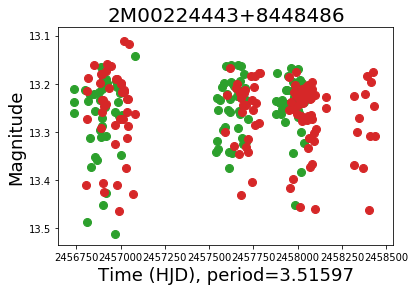

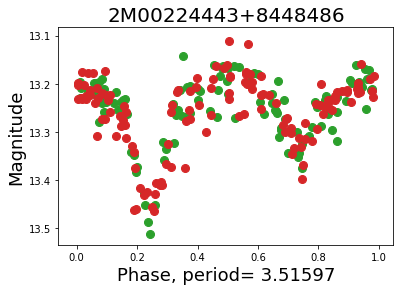

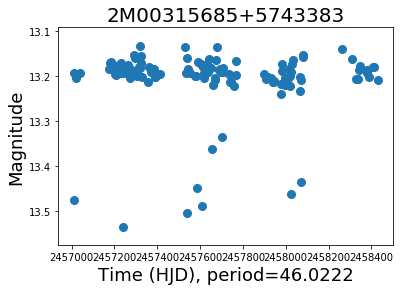

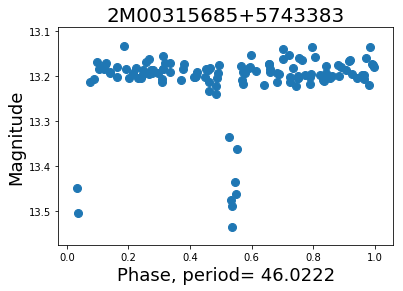

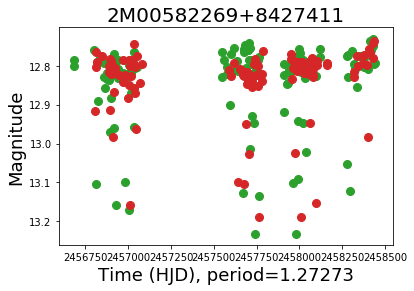

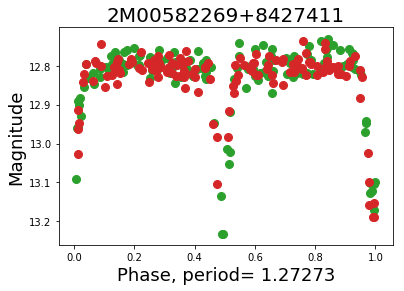

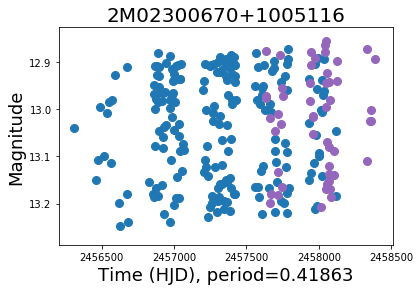

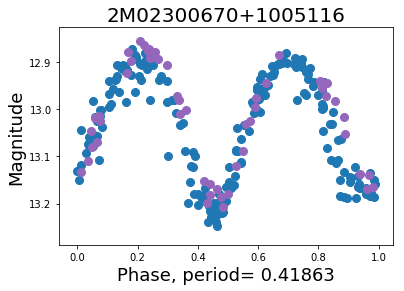

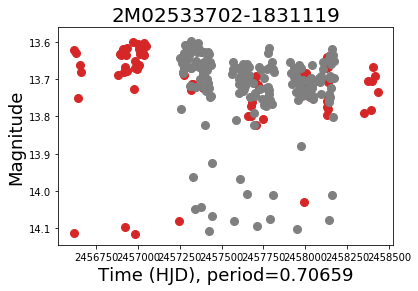

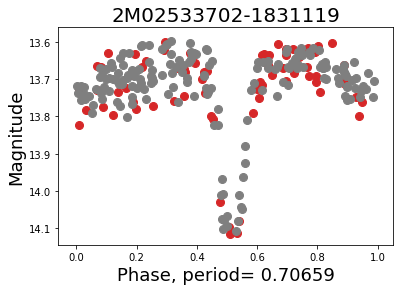

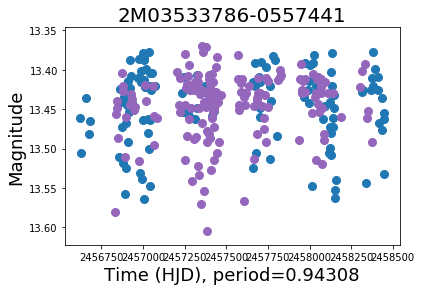

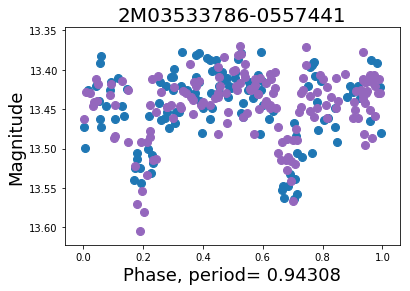

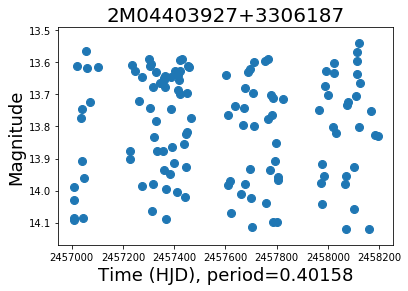

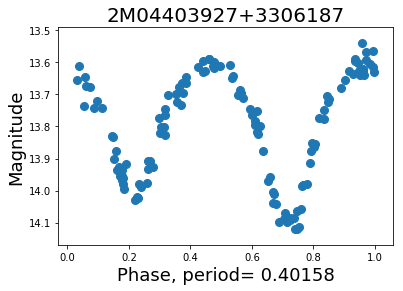

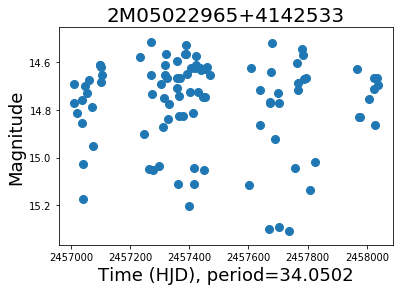

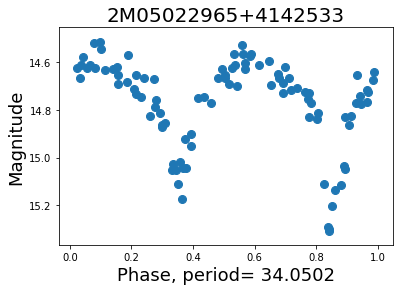

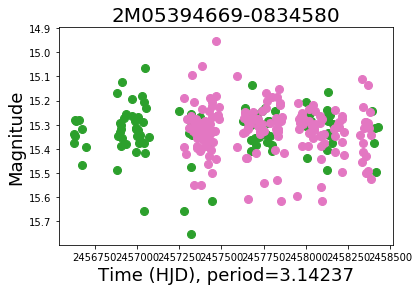

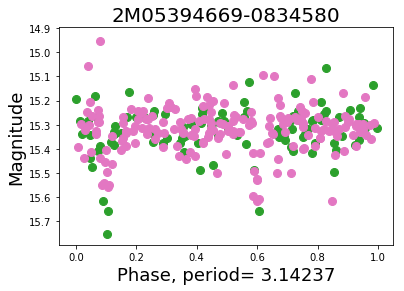

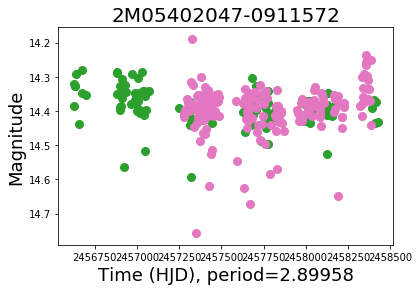

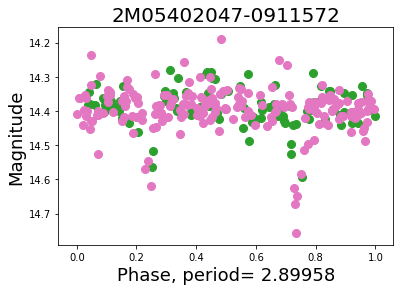

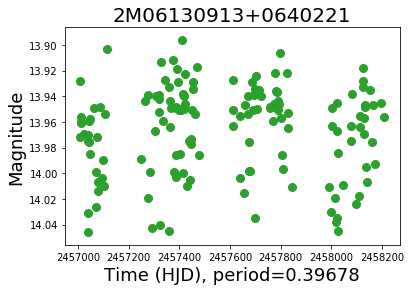

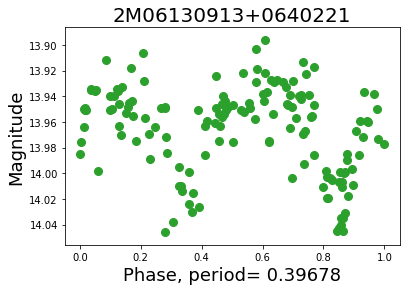

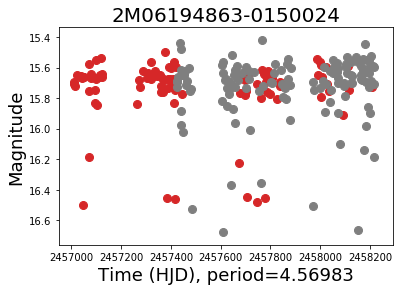

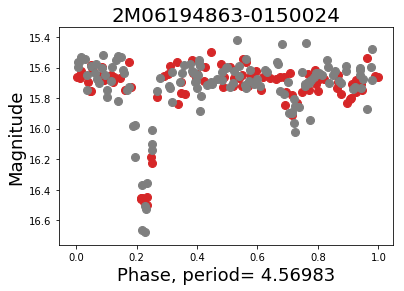

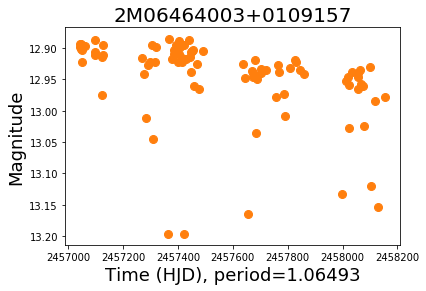

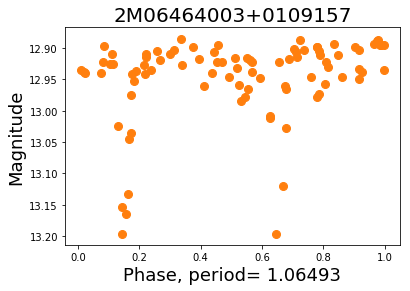

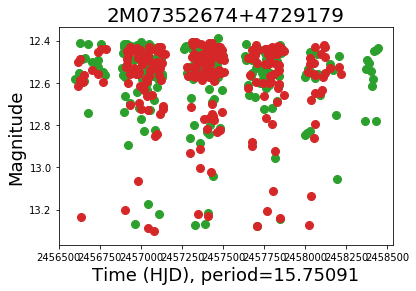

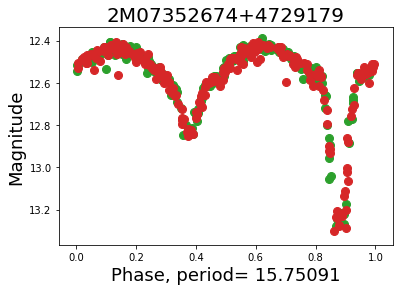

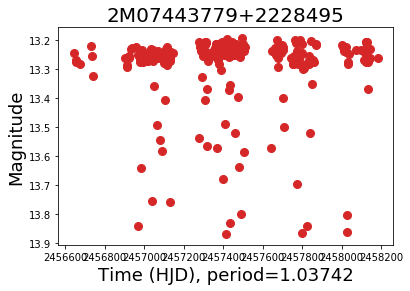

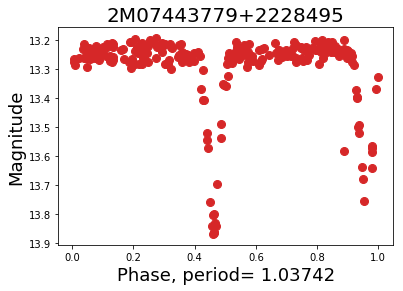

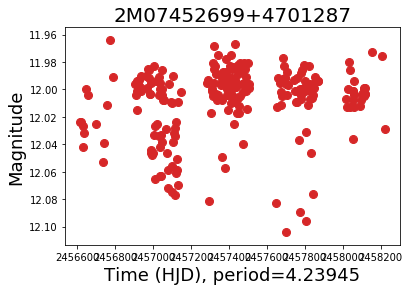

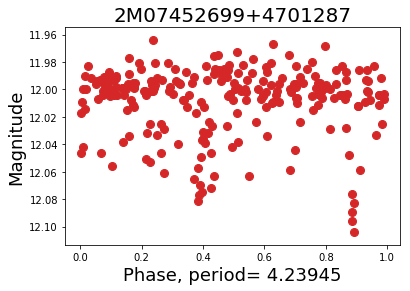

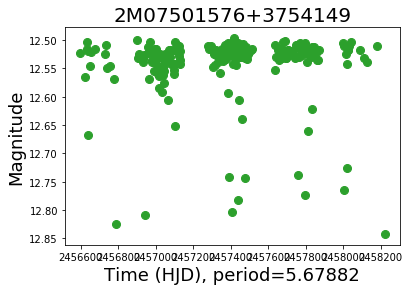

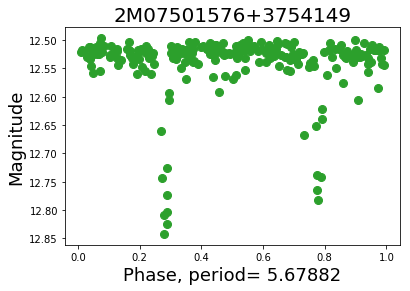

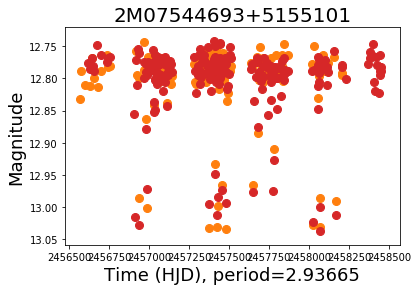

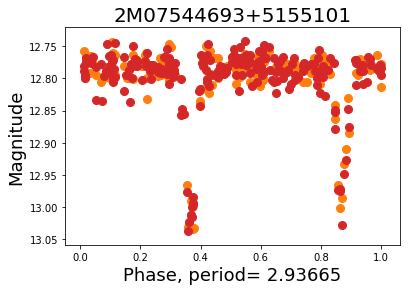

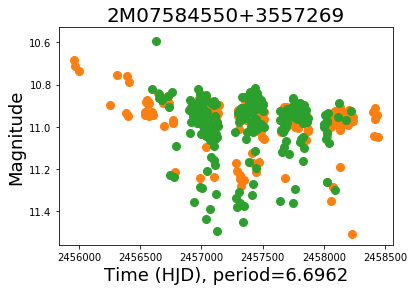

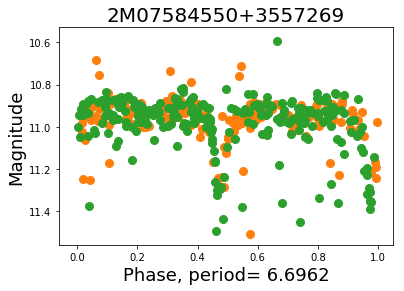

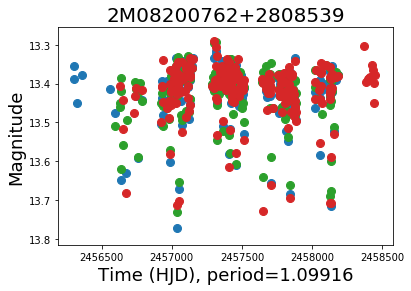

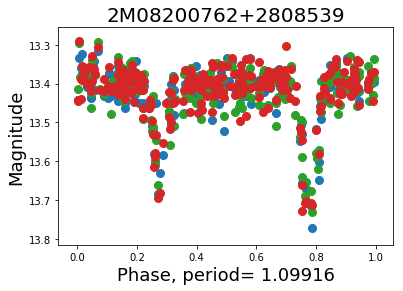

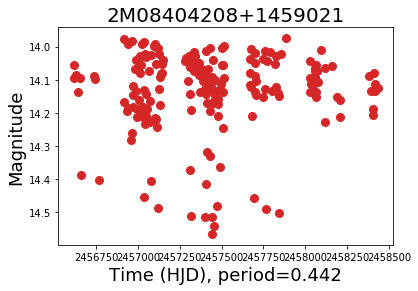

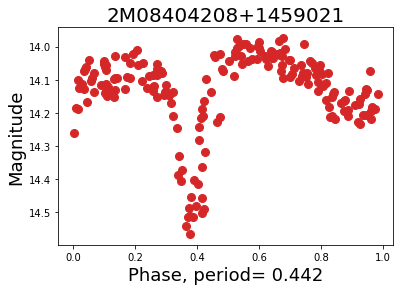

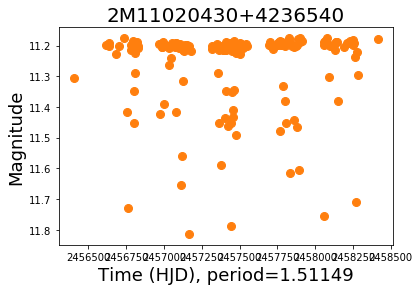

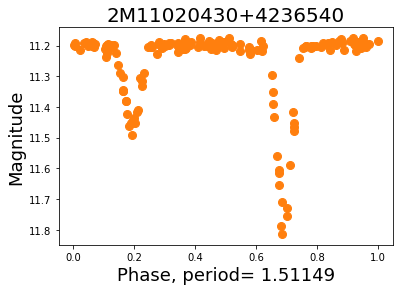

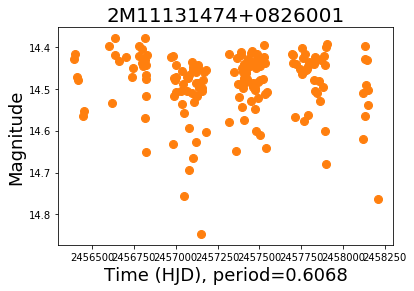

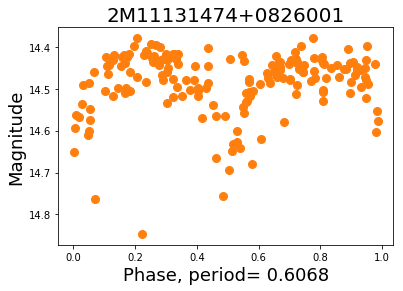

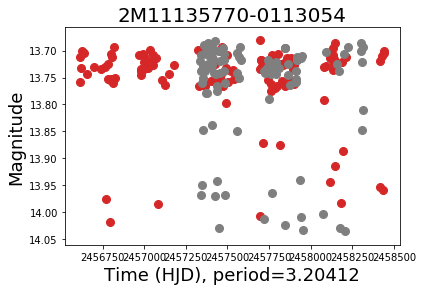

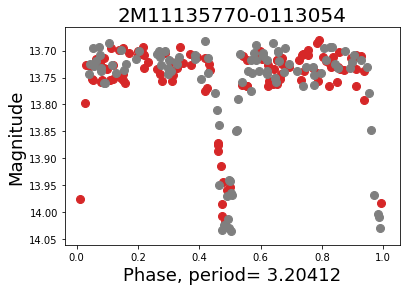

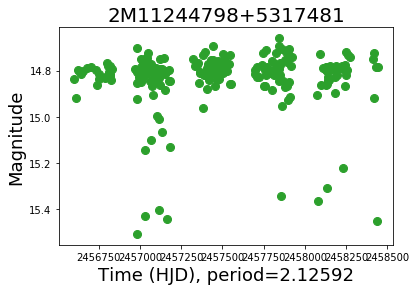

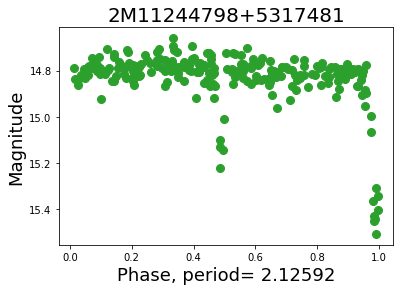

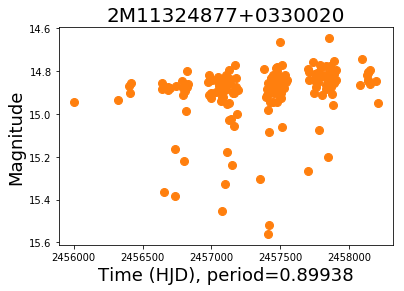

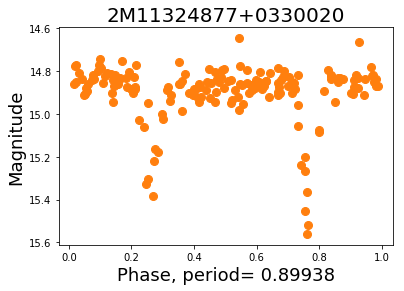

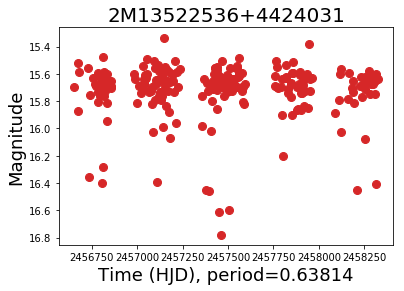

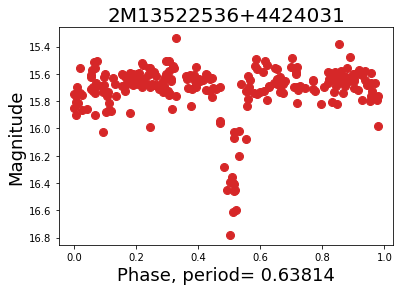

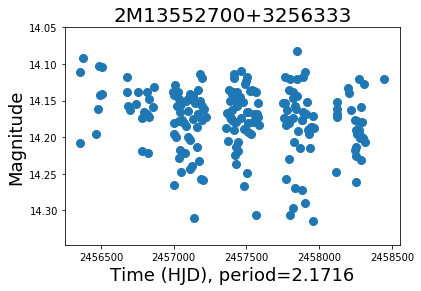

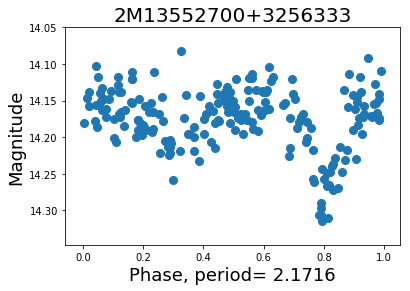

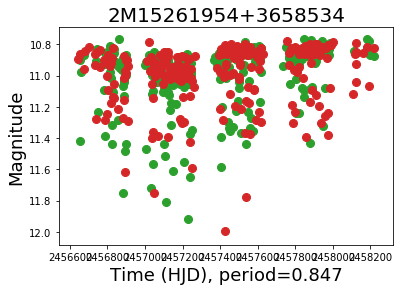

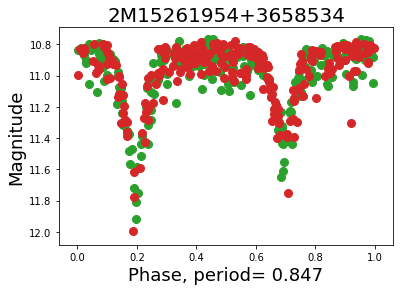

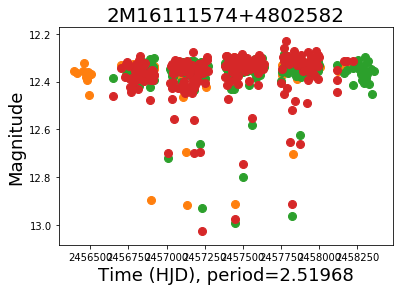

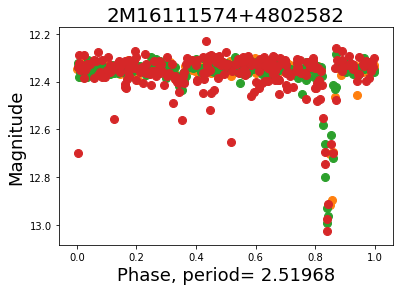

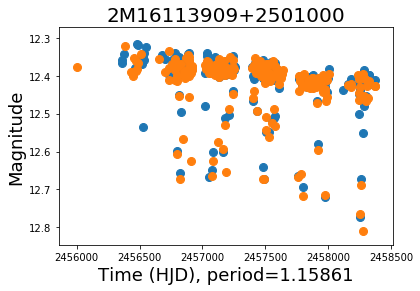

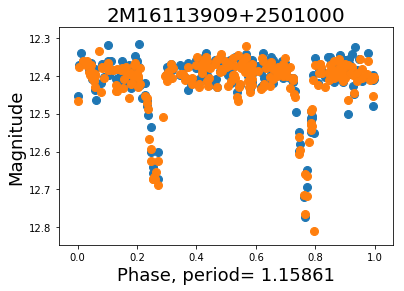

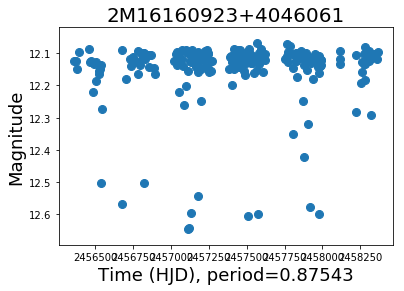

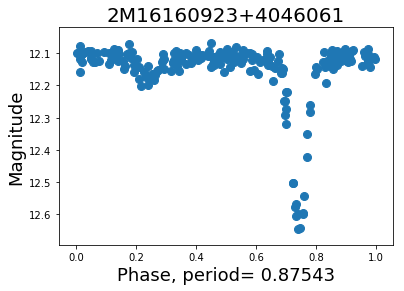

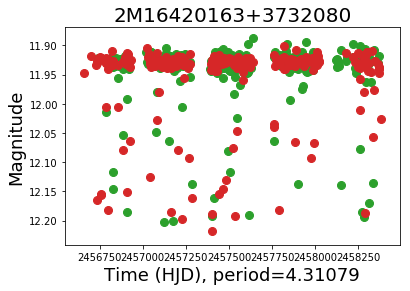

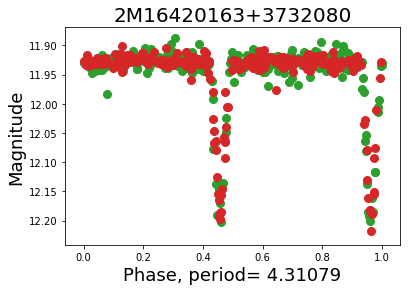

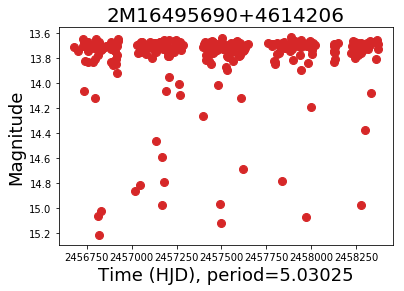

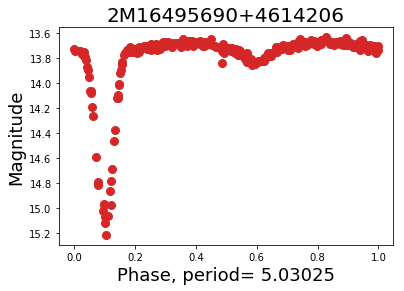

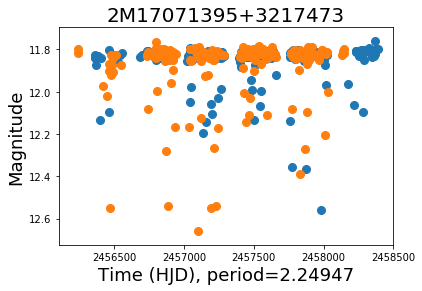

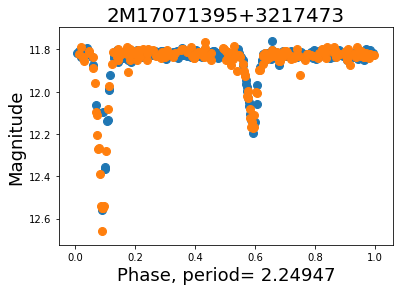

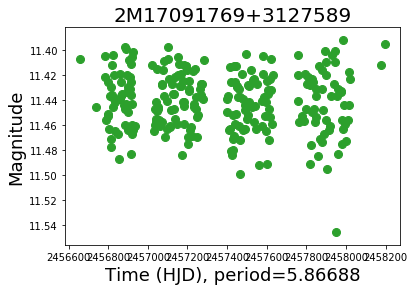

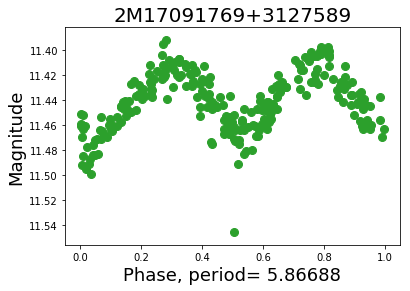

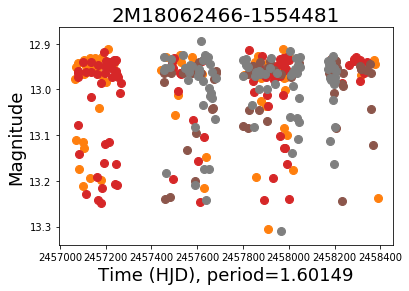

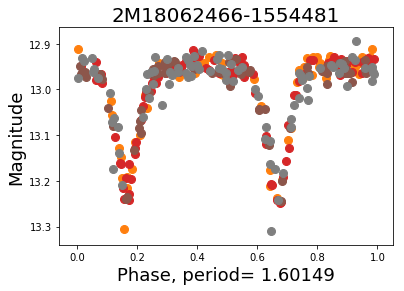

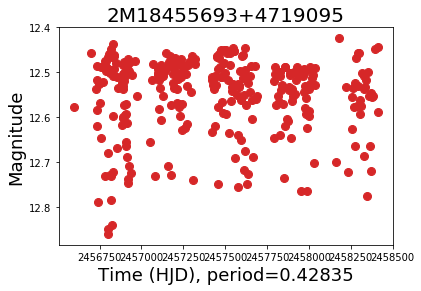

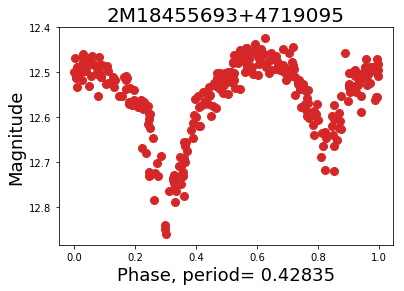

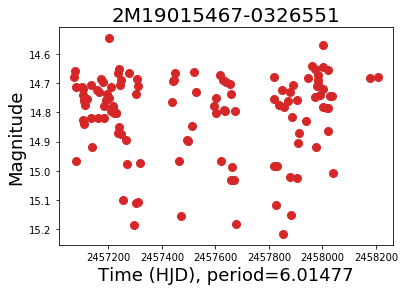

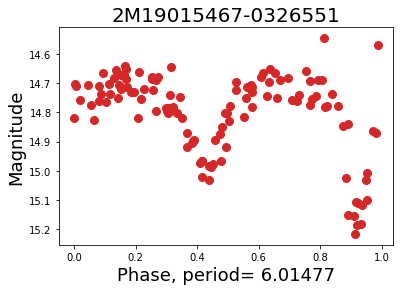

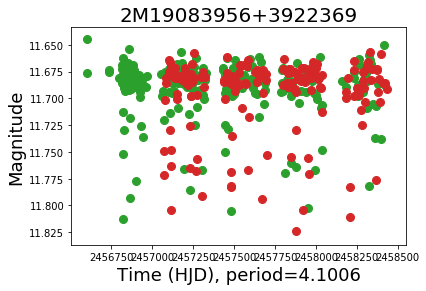

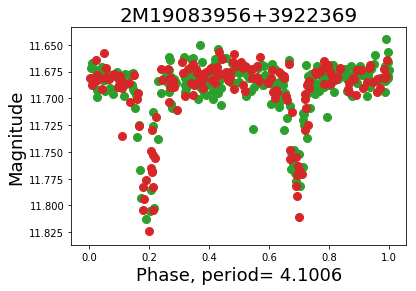

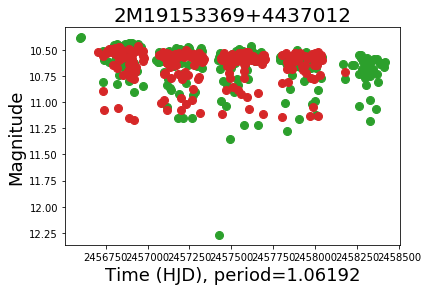

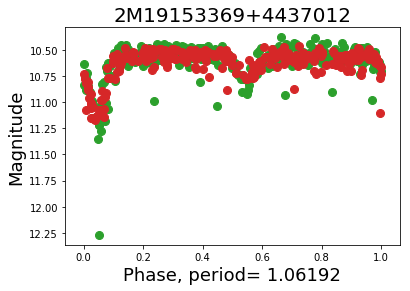

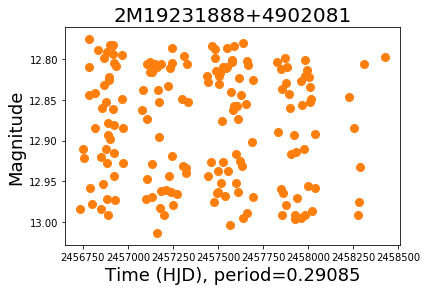

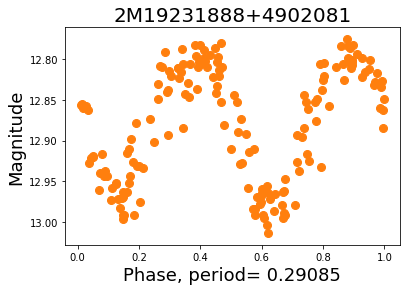

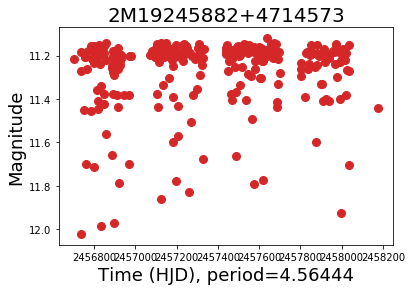

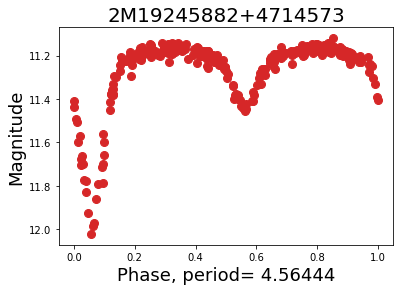

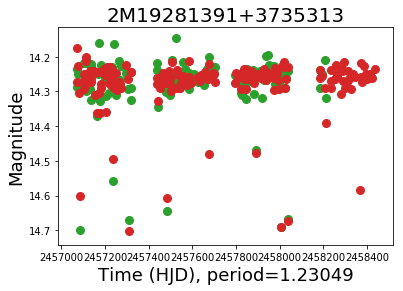

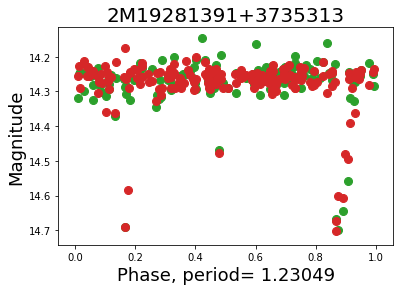

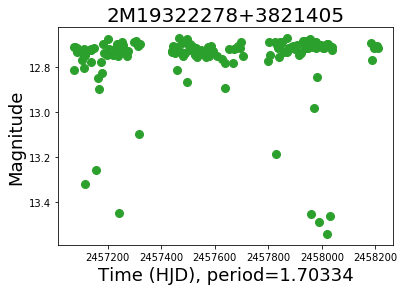

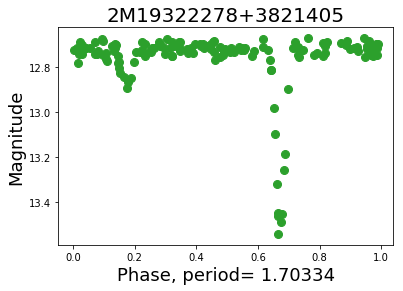

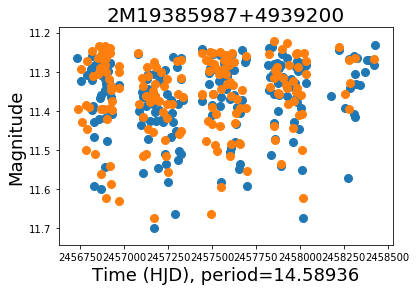

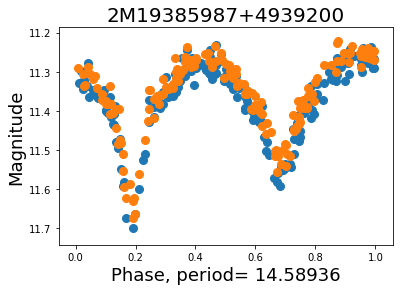

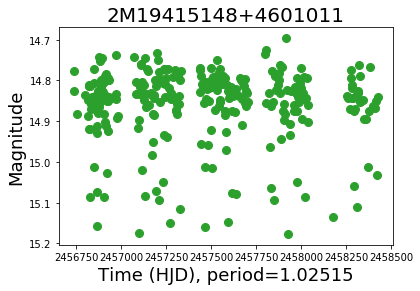

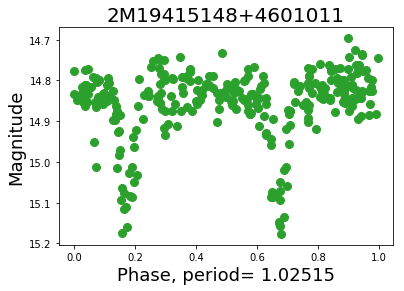

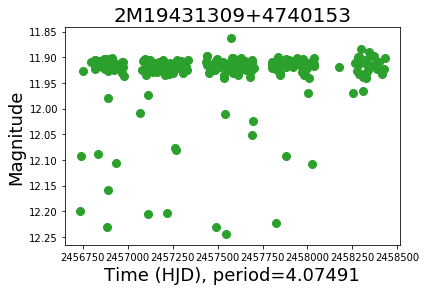

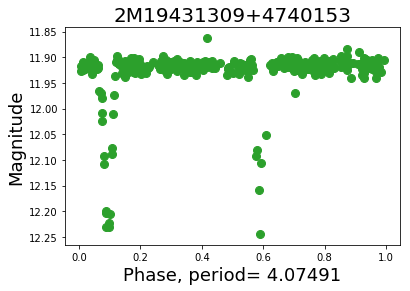

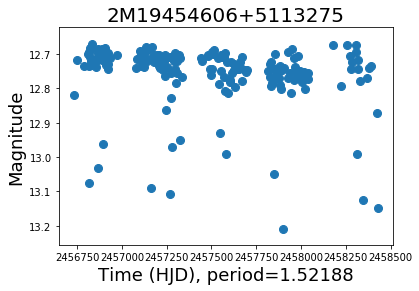

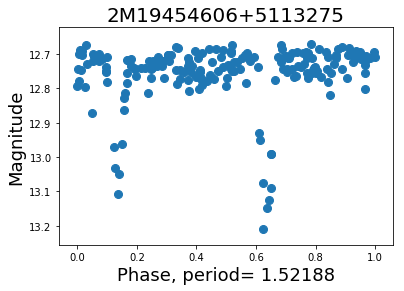

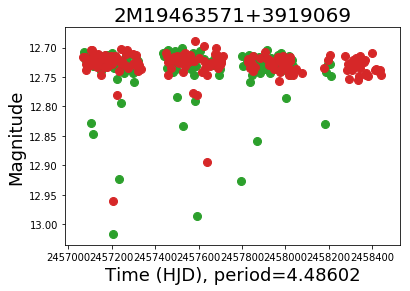

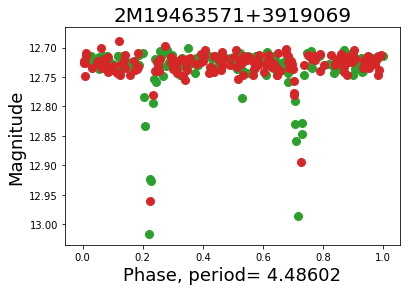

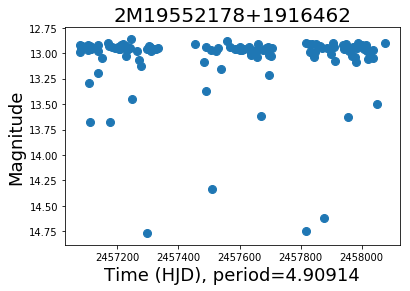

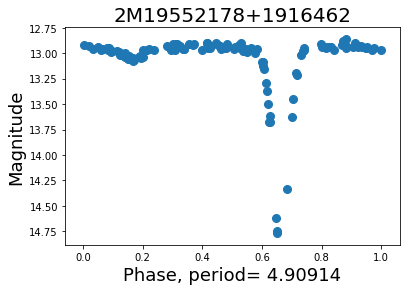

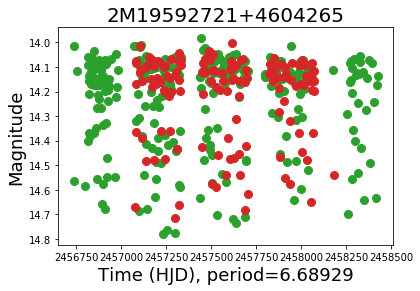

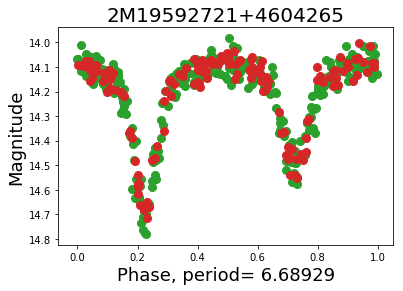

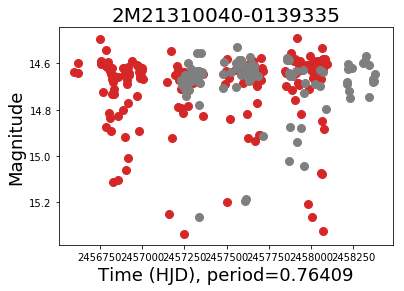

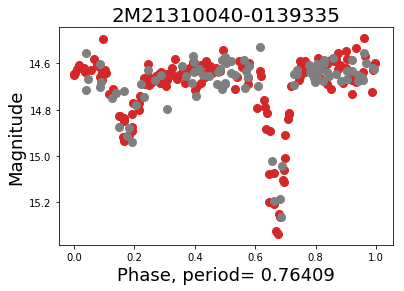

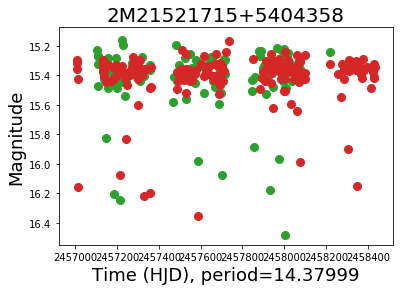

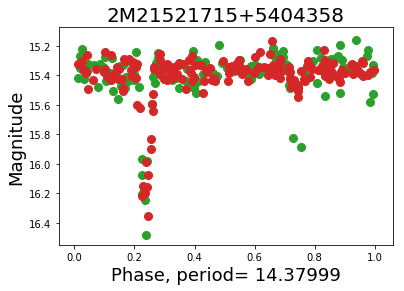

In [6]:
def LightCurveMagnitude(listofIDs):
    #using i to find the index within the period list while running the for loop to 
    #correctly match the period to the system
    i = 0
    for x in listofIDs:
        blah = '/Volumes/CoveyData/APOGEE_Spectra/Anna/Light_curves/'+x+'.LC.csv'
        newDF = pd.read_csv(blah)
        BDCamera = newDF[newDF['camera']== 'bd']     
        BCCamera = newDF[newDF['camera']== 'bc']
        BACamera = newDF[newDF['camera']== 'ba']
        BBCamera = newDF[newDF['camera']== 'bb']
        BECamera = newDF[newDF['camera']== 'be']
        BFCamera = newDF[newDF['camera']== 'bf']
        BGCamera = newDF[newDF['camera']== 'bg']
        BHCamera = newDF[newDF['camera']== 'bh']
        cameras = [BACamera, BBCamera, BCCamera, BDCamera, BECamera, BFCamera, BGCamera, BHCamera]
        for this in cameras:
            UnphasedLightCurveMag = plt.scatter(this['hjd'], this['mag'])
       #plotting the unphased light curves
        plt.gca().invert_yaxis()
        plt.title(x)
        plt.xlabel('Time (HJD), period='+days[i])
        plt.ylabel('Magnitude')
        plt.show(UnphasedLightCurveMag)
        #plotting the phased light curve right underneath
        period = float(days[i])
        for that in cameras:
            phase = (that['hjd']%period)/period
            PhasedLightCurve = plt.scatter(phase, that['mag'])
        plt.gca().invert_yaxis()
        plt.title(x)
        plt.xlabel('Phase, period= '+days[i])
        plt.ylabel('Magnitude')
        plt.show(PhasedLightCurve)
        i= i+1
        
LightCurveMagnitude(listID)

In [4]:
def figuringNumbers(sameListofIds):
    i = 0
    for ah in sameListofIds:
        file = '/Volumes/CoveyData/APOGEE_Spectra/Anna/Light_curves/'+ah+'.LC.csv'
        dataframe = pd.read_csv(file)
        BACamera = dataframe[dataframe['camera']== 'ba']
        BBCamera = dataframe[dataframe['camera']== 'bb']
        BCCamera = dataframe[dataframe['camera']== 'bc']
        BDCamera = dataframe[dataframe['camera']== 'bd']
        BECamera = dataframe[dataframe['camera']== 'be']
        BFCamera = dataframe[dataframe['camera']== 'bf']
        BGCamera = dataframe[dataframe['camera']== 'bg']
        BHCamera = dataframe[dataframe['camera']== 'bh']
        cameras = [BACamera, BBCamera, BCCamera, BDCamera, BECamera, BFCamera, BGCamera, BHCamera]
        i = 0
        for this in cameras:
            i = i+1 
            if this.empty == True:
                continue
            else:    
                medianFlux = DataFrame.median(this['flux (mJy)'])
                medianMag = DataFrame.median(this['mag'])
                mode = this['mag'].mode()
                print(ah, i, "Flux =", medianFlux, "Magnitude =", medianMag)
                print(ah, i, "Magnitude mode =", mode)

figuringNumbers(listID)

2M00224443+8448486 3 Flux = 18.197499999999998 Magnitude = 13.238
2M00224443+8448486 3 Magnitude mode = 0    13.21
dtype: float64
2M00224443+8448486 4 Flux = 19.445999999999998 Magnitude = 13.238
2M00224443+8448486 4 Magnitude mode = 0    13.218
dtype: float64
2M00315685+5743383 1 Flux = 20.268500000000003 Magnitude = 13.193
2M00315685+5743383 1 Magnitude mode = 0    13.193
dtype: float64
2M00582269+8427411 3 Flux = 28.914 Magnitude = 12.807
2M00582269+8427411 3 Magnitude mode = 0    12.798
1    12.807
2    12.809
3    12.819
dtype: float64
2M00582269+8427411 4 Flux = 28.721999999999998 Magnitude = 12.807
2M00582269+8427411 4 Magnitude mode = 0    12.796
1    12.823
2    12.829
dtype: float64
2M02300670+1005116 1 Flux = 23.886 Magnitude = 13.014000000000001
2M02300670+1005116 1 Magnitude mode = 0    12.908
1    12.981
dtype: float64
2M02300670+1005116 5 Flux = 23.316 Magnitude = 13.014000000000001
2M02300670+1005116 5 Magnitude mode = 0    12.944
1    13.026
dtype: float64
2M02533702-1

2M19385987+4939200 1 Flux = 111.28299999999999 Magnitude = 11.344000000000001
2M19385987+4939200 1 Magnitude mode = 0    11.278
1    11.284
2    11.297
3    11.307
4    11.324
5    11.359
6    11.362
7    11.372
dtype: float64
2M19385987+4939200 2 Flux = 110.62549999999999 Magnitude = 11.344000000000001
2M19385987+4939200 2 Magnitude mode = 0    11.253
dtype: float64
2M19415148+4601011 3 Flux = 4.4515 Magnitude = 14.8385
2M19415148+4601011 3 Magnitude mode = 0    14.834
1    14.844
dtype: float64
2M19431309+4740153 3 Flux = 65.6695 Magnitude = 11.915999999999999
2M19431309+4740153 3 Magnitude mode = 0    11.916
dtype: float64
2M19454606+5113275 1 Flux = 30.88 Magnitude = 12.735999999999999
2M19454606+5113275 1 Magnitude mode = 0    12.712
dtype: float64
2M19463571+3919069 3 Flux = 31.227000000000004 Magnitude = 12.725999999999999
2M19463571+3919069 3 Magnitude mode = 0    12.714
dtype: float64
2M19463571+3919069 4 Flux = 31.159499999999998 Magnitude = 12.725999999999999
2M19463571+3919